In [1]:
from quantileRegression import quantileRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/02


In [2]:
N = 1000000

In [3]:
# load mc
qr_mc = quantileRegression("mc")
print "Load the mc dataframe"
startEvtmc = 2000001
stopEvtmc  = 3000000
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
dfmc = qr_mc.getDF()

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13T

In [4]:
# load data
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)
dfdata = qr_data.getDF()

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  c

In [5]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfmcEB   = dfmc  .query('-1.444 < ScEta & ScEta <1.444')
dfmcEE   = dfmc  .query('ScEta < -1.57 | ScEta >1.57  ') 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') 

In [23]:
yvar = 'S4'

In [24]:
g1EB = dfmcEB[yvar]
g1EE = dfmcEE[yvar]

In [25]:
g2EB = dfdataEB[yvar]
g2EE = dfdataEE[yvar]

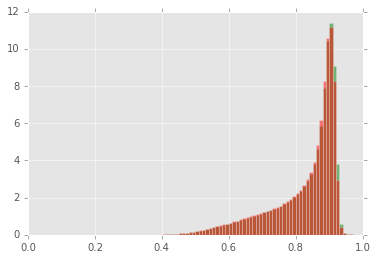

In [26]:
bins=np.arange(0,1,0.01)
fig = plt.figure()
plt.hist(g1EB ,bins, alpha = 0.5, color='g', normed = 1)
plt.hist(g2EB ,bins, alpha = 0.5, color='r', normed = 1)
plt.show()

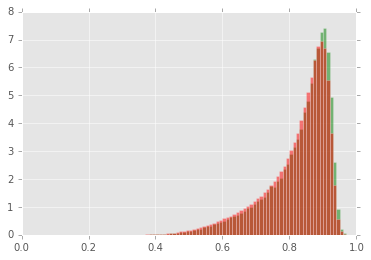

In [27]:
bins=np.arange(0,1,0.01)
fig = plt.figure()
plt.hist(g1EE ,bins, alpha = 0.5, color='g', normed = 1)
plt.hist(g2EE ,bins, alpha = 0.5, color='r', normed = 1)
plt.show()

In [28]:
g1sEB = np.sort(g1EB)
x1EB = np.array(range(len(g1EB)))/float(len(g1EB))
g2sEB = np.sort(g2EB)
x2EB = np.array(range(len(g2EB)))/float(len(g2EB))

In [29]:
g1sEE = np.sort(g1EE)
x1EE = np.array(range(len(g1EE)))/float(len(g1EE))
g2sEE = np.sort(g2EE)
x2EE = np.array(range(len(g2EE)))/float(len(g2EE))

In [30]:
q1EB = []
q2EB = []
for i in range(0,110,10):
    print i, np.percentile(g1sEB, i), np.percentile(g2sEB, i)
    q1EB.append(np.percentile(g1sEB, i))
    q2EB.append(np.percentile(g2sEB, i))

0 0.305234462023 0.176507279277
10 0.667329955101 0.665395063162
20 0.748991143703 0.746429681778
30 0.804618179798 0.801946878433
40 0.843050086498 0.840433835983
50 0.868529558182 0.866152942181
60 0.884672367573 0.882546198368
70 0.895543193817 0.893623352051
80 0.904425776005 0.902611708641
90 0.913532221317 0.911821186543
100 0.988625824451 0.983991444111


In [31]:
q1EE = []
q2EE = []
for i in range(0,110,10):
    print i, np.percentile(g1sEE, i), np.percentile(g2sEE, i)
    q1EE.append(np.percentile(g1sEE, i))
    q2EE.append(np.percentile(g2sEE, i))

0 0.327404886484 0.25754147768
10 0.687012588978 0.673862814903
20 0.758546423912 0.746744811535
30 0.803367865086 0.792269825935
40 0.833831954002 0.82423967123
50 0.856842756271 0.848218351603
60 0.874913215637 0.867261886597
70 0.890006399155 0.883195191622
80 0.903617143631 0.897773325443
90 0.917921352386 0.912892401218
100 0.978448927402 0.994141817093


In [32]:
# vector with the corrected mc->data value

corrEB = []
for evt in g1EB:
# def correct():
    qmc_low  = 0
    qmc_high = 0
    q = 1
    # print evt

    # find the quantile in mc
    while (q1EB[q] < evt) and (q < len(q1EB)):
        # print "mc   ", q, len(q1EB), q1EB[q-1], q1EB[q], evt
            q+=1
    qmc_low  = q1EB[q-1]
    qmc_high = q1EB[q]
    # print "mc-quantile    ", q, " --> [ ", qmc_low ,qmc_high, " ]"

    # find the corresponding one in data
    qdata_low  = 0
    qdata_high = 0
    qdata_low  = q2EB[q-1]
    qdata_high = q2EB[q]
    # print "data-quantiles  --> [ ", qdata_low ,qdata_high, " ]"
    
    # interplopate the correction
    evtCorr = (qdata_high-qdata_low)/(qmc_high-qmc_low) * (evt - qmc_low) + qdata_low
    # print "Apply correction: Input value = ", evt, " --> corrected value = ", evtCorr
    corrEB.append(evtCorr)
#     return evtCorr

In [33]:
# vector with the corrected mc->data value

corrEE = []
for evt in g1EE:
# def correct():
    qmc_low  = 0
    qmc_high = 0
    q = 1
    # print evt

    # find the quantile in mc
    while (q1EE[q] < evt) and (q < len(q1EE)):
        # print "mc   ", q, len(q1EE), q1EE[q-1], q1EE[q], evt
            q+=1
    qmc_low  = q1EE[q-1]
    qmc_high = q1EE[q]
    # print "mc-quantile    ", q, " --> [ ", qmc_low ,qmc_high, " ]"

    # find the corresponding one in data
    qdata_low  = 0
    qdata_high = 0
    qdata_low  = q2EE[q-1]
    qdata_high = q2EE[q]
    # print "data-quantiles  --> [ ", qdata_low ,qdata_high, " ]"
    
    # interplopate the correction
    evtCorr = (qdata_high-qdata_low)/(qmc_high-qmc_low) * (evt - qmc_low) + qdata_low
    # print "Apply correction: Input value = ", evt, " --> corrected value = ", evtCorr
    corrEE.append(evtCorr)
#     return evtCorr

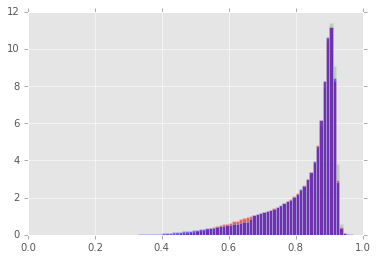

In [34]:
fig = plt.figure()
plt.hist(g1EB  ,bins, alpha = 0.2, color='g', normed = 1)
plt.hist(g2EB  ,bins, alpha = 0.5, color='r', normed = 1)
plt.hist(corrEB,bins, alpha = 0.5, color='b', normed = 1)
plt.show()

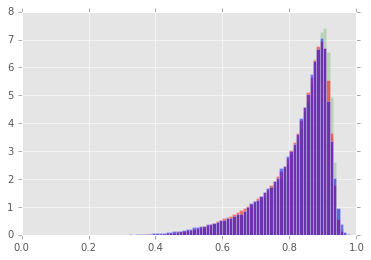

In [35]:
fig = plt.figure()
plt.hist(g1EE  ,bins, alpha = 0.2, color='g', normed = 1)
plt.hist(g2EE  ,bins, alpha = 0.5, color='r', normed = 1)
plt.hist(corrEE,bins, alpha = 0.5, color='b', normed = 1)
plt.show()

In [36]:
dfmcEB[yvar+'_corr'] = corrEB
dfmcEE[yvar+'_corr'] = corrEE

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
#poors man profile plot
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

def Profile(x,y,nbins,xmin,xmax,ax, color):
    df = DataFrame({'x' : x , 'y' : y})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    for bin in bins:
        ProfileFrame.ix[bin,'ymean']      = df.ix[df['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev']  = df.ix[df['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax

plotting  S4


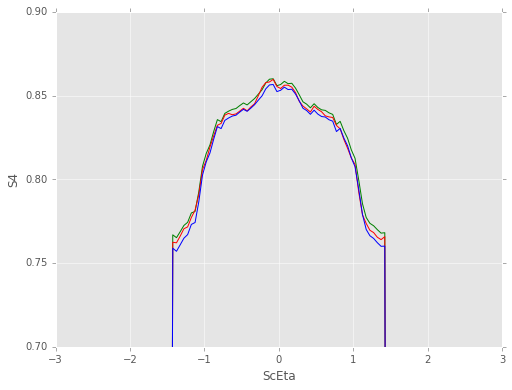

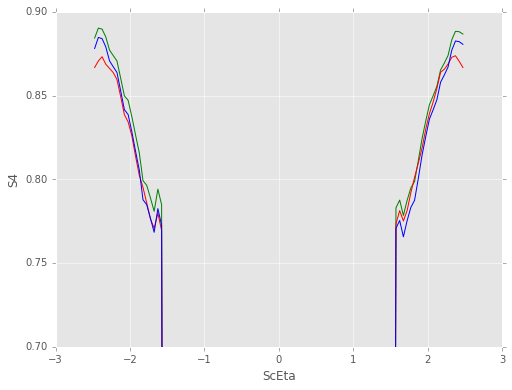

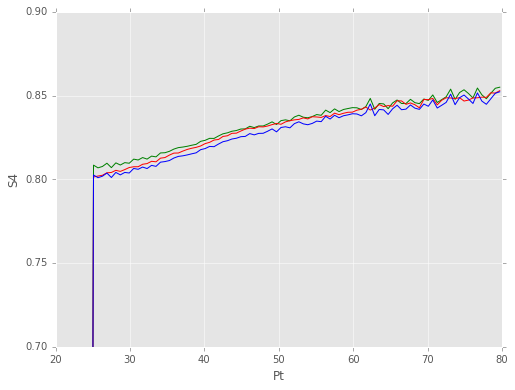

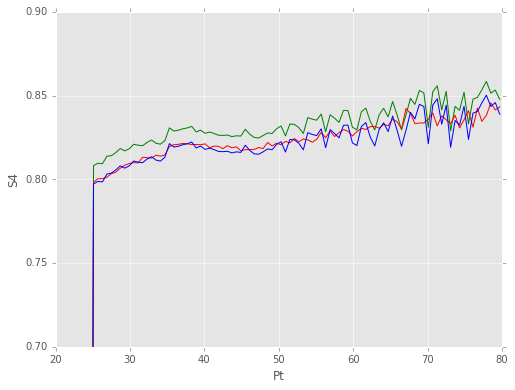

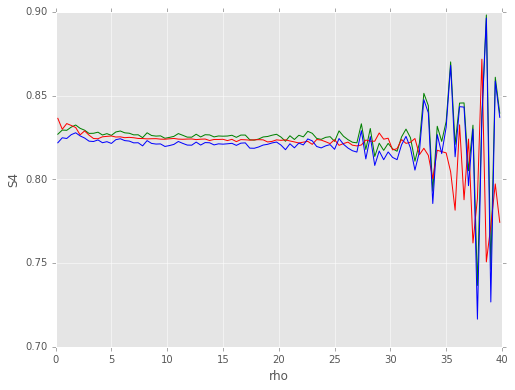

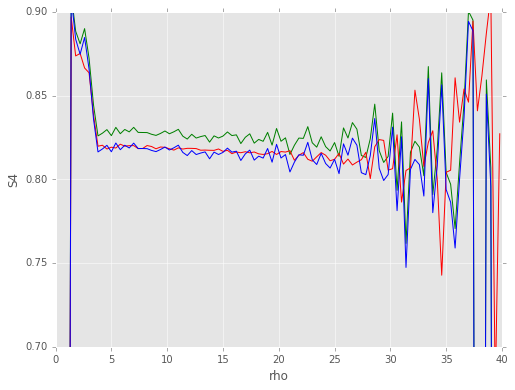

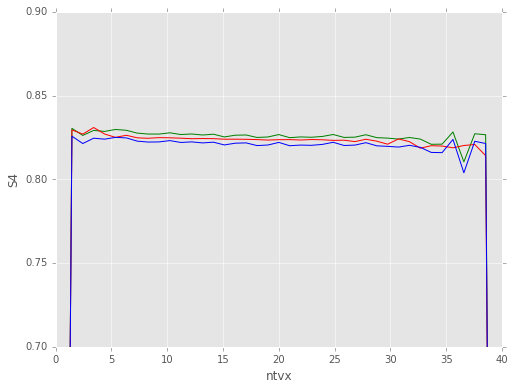

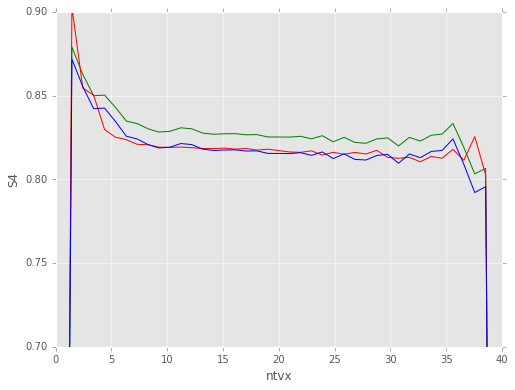

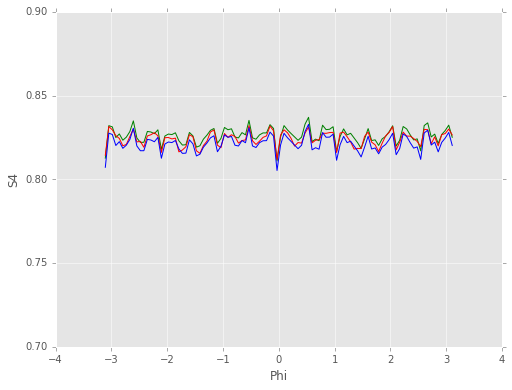

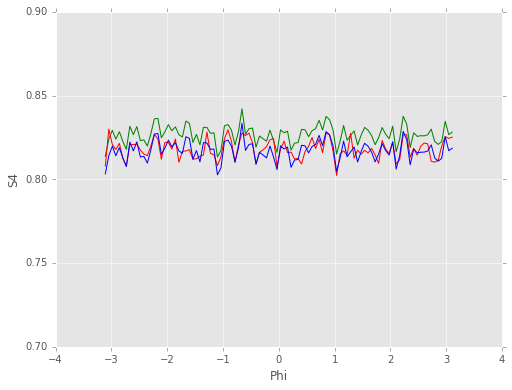

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

ylist = [yvar]

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
        
                
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['ScEta']  , dfmcEB[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEB['ScEta'], dfdataEB[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEB['ScEta']  , dfmcEB[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['ScEta']  , dfmcEE[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEE['ScEta'], dfdataEE[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEE['ScEta']  , dfmcEE[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['Pt']  , dfmcEB[yvar]        ,100,20.,80.,ax, 'green')
    Profile(dfdataEB['Pt'], dfdataEB[yvar]      ,100,20.,80.,ax, 'red')
    Profile(dfmcEB['Pt']  , dfmcEB[yvar+'_corr'],100,20.,80.,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['Pt']  , dfmcEE[yvar]        ,100,20.,80.,ax, 'green')
    Profile(dfdataEE['Pt'], dfdataEE[yvar]      ,100,20.,80.,ax, 'red')
    Profile(dfmcEE['Pt']  , dfmcEE[yvar+'_corr'],100,20.,80.,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['rho']  , dfmcEB[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataEB['rho'], dfdataEB[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcEB['rho']  , dfmcEB[yvar+'_corr'],100,0.,40.,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['rho']  , dfmcEE[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataEE['rho'], dfdataEE[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcEE['rho']  , dfmcEE[yvar+'_corr'],100,0.,40.,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ntvx')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['nvtx']  , dfmcEB[yvar]        ,41,0.,40.,ax, 'green')
    Profile(dfdataEB['nvtx'], dfdataEB[yvar]      ,41,0.,40.,ax, 'red')
    Profile(dfmcEB['nvtx']  , dfmcEB[yvar+'_corr'],41,0.,40.,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('ntvx')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['nvtx']  , dfmcEE[yvar]        ,41,0.,40.,ax, 'green')
    Profile(dfdataEE['nvtx'], dfdataEE[yvar]      ,41,0.,40.,ax, 'red')
    Profile(dfmcEE['nvtx']  , dfmcEE[yvar+'_corr'],41,0.,40.,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Phi')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['Phi']  , dfmcEB[yvar]        ,100,-3.14,3.14,ax, 'green')
    Profile(dfdataEB['Phi'], dfdataEB[yvar]      ,100,-3.14,3.14,ax, 'red')
    Profile(dfmcEB['Phi']  , dfmcEB[yvar+'_corr'],100,-3.14,3.14,ax, 'blue')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('Phi')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['Phi']  , dfmcEE[yvar]        ,100,-3.14,3.14,ax, 'green')
    Profile(dfdataEE['Phi'], dfdataEE[yvar]      ,100,-3.14,3.14,ax, 'red')
    Profile(dfmcEE['Phi']  , dfmcEE[yvar+'_corr'],100,-3.14,3.14,ax, 'blue')